Alejandra Duque Maldonado

# Assignment 2

This program aims to extract and annotate linguistic data from a book from Project Gutenberg. We will be working with "Alice in Wonderland" by Lewis Carroll, the same book we used for Assignment 1. 

With this program we will read the book, tokenize its words, clean the text from stopwords and punctuation and, finally, perform POS tagging to count its frequency. For this task we will use the packages listed below.

For the linguistic analysis, we will make use of the different NLTK functionalities, mainly its corpus, Regex tokenizer and POS tagger. To plot a graphic of the final output, we will make use of the Matplotlib library. 

Note: In case of not having the "wordnet" database included in the Python enviroment, take out comment from line 12 and run the cell. 

In [1]:
import nltk
from nltk import word_tokenize
import string
from nltk.probability import FreqDist
import numpy as np 
import re 
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
#nltk.download('wordnet')
from nltk.probability import FreqDist 
import matplotlib.pyplot as plt

This first line of code opens and reads the book we will use. Once again, the book we need is located in the zip folder of this assignment as a .txt file. The following line locates and reads the file, encoding the text in UTF-8-sig so it can be correctly interpreted.

In [2]:
book= open("alice.txt", "r", encoding= "utf-8-sig").read()

The following line of code uses the NLTK tokenizer to split the text in words. From this we will be able to observe which possible problems would arise from this by-default tokenization. 

In [3]:
default_tokens_alice= word_tokenize(book)
print(default_tokens_alice[:50])
print(f'Issues in tokens:{default_tokens_alice[5]},{default_tokens_alice[6]}')

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'This', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use']
Issues in tokens:Alice,'s


After analyzing the data, we can one issue that arises from by-default tokenization is the separation of the possesive mark, "'s", from its noun. Generally, this would not be a problem in tokenization but rather something that would have to be handled differently depending on the problem that is treated. For this task, we will be mantaining the possisive attached to its nucleus (the noun). We do this to facilitate POS tagging and interpret "Alice's" to have a different function in comparison to the "Alice" token. Also, we do this to differentiate possesive markers "'s" from other english contractions (i.e. "'s" in "it's"), as this can be ambiguous. 

To fix this, we will make use of the RegexTokenizer and a regular expression to adapt our tokenization to the task. This regular expression uses a non-capturing function in Regex (i.e. "(?: )"), which indicates the expression to obviate every string that matches the pattern inside this non-capturing group. In a nutshell, in this tokenizer we will use an expression that commands it not to capture full-words and words with apostrophes in the middle. 

The regular expression first finds the boundaries in strings, and then checks if the word matches the non-capturing group. Inside this group, the Regex matches those strings that have an apostrophe in between two alphanumeric characters and the strings that one or more alphanumeric character (i.e. every other word). 

This way, our final output consists of tokenized words, including words that include an apostrophe. 

In [4]:
tokenizer = RegexpTokenizer(r"\b(?:\w+['’]\w+|\w+)\b")
alice_tokens= tokenizer.tokenize(book)
alice_tokens[:100]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 "Alice's",
 'Adventures',
 'in',
 'Wonderland',
 'This',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'United',
 'States',
 'and',
 'most',
 'other',
 'parts',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'You',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'org',
 'If',
 'you',
 'are',
 'not',
 'located',
 'in',
 'the',
 'United',
 'States',
 'you',
 'will',
 'have',
 'to',
 'check',
 'the',
 'laws',
 'of',
 'the',
 'country',
 'where',
 'you',
 'are',
 'located',
 'before',
 'using',
 'this',
 'eBook',
 'Title',
 "Alice's",
 'Adventures',
 'in',
 'Wonderland',
 'Author']

To normalize the tokenized text, we will now convert our strings into uniform strings with lowercase characters. We do this by using the .lower() function.

In [5]:
lower_alice=[w.lower() for w in alice_tokens]

Now, to finish normalizing our data, we will take out all of punctuation and stop words (i.e. semantically empty words). We do this so we can work uniquely with words that have meaning.   

In [6]:
punctuation= string.punctuation #String with list of punctuation
excluded_signs= ["’", "“", "”","‘"] #List of all of the signs that are not included in the predefined string
clean_alice= [w for w in lower_alice if w not in punctuation and w not in excluded_signs] #Excludes punctuation
stopwords= stopwords.words('english')
ns_alice= [w for w in clean_alice if w not in stopwords] #removes stopwords using nltk corpus

For this task, we are aiming to perform lemmatization of our list of words. However, orior to lemmatizing the words, we need to perform a POS tagging so the lemmatizer by NLTK can correctly take each word category and lemmatize them accordinly. For this we use the POS tagger included in the NLTK library. 


In [7]:
pos_words= pos_tag(ns_alice)
print(pos_words[:20])

[('project', 'NN'), ('gutenberg', 'NN'), ('ebook', 'NN'), ("alice's", 'NN'), ('adventures', 'NNS'), ('wonderland', 'VBP'), ('ebook', 'NN'), ('use', 'NN'), ('anyone', 'NN'), ('anywhere', 'RB'), ('united', 'JJ'), ('states', 'NNS'), ('parts', 'NNS'), ('world', 'NN'), ('cost', 'NN'), ('almost', 'RB'), ('restrictions', 'NNS'), ('whatsoever', 'VBP'), ('may', 'MD'), ('copy', 'VB')]


Given that the NLTK lemmatizer takes as arguments a word and its category (not represented by the POS tag format, but rather a single letter assigned to each category) we will define a function to translate these tags into the appropiate format. The following function has been found in the following forum and adapted to this code (https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/). 

We first define a function that converts each tag to the appropiate format using *if* conditions. After this is defined, we apply it to the previously defined variable containing the words and POS tags. The last line of code maps each element of the tuple (in position [1]) and applies the defined option to it. The resulting output is seen in the wordnet_tagged variable, containing a modified version of the POS tags. 

In [8]:
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None
wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_words))
print(f'Example of the output:{wordnet_tagged[:10]}')

Example of the output:[('project', 'n'), ('gutenberg', 'n'), ('ebook', 'n'), ("alice's", 'n'), ('adventures', 'n'), ('wonderland', 'v'), ('ebook', 'n'), ('use', 'n'), ('anyone', 'n'), ('anywhere', 'r')]


Now that we have adapted our data, we can perform lemmatization. The following cell defined the lemmatizer and an empty list to store the output. To lemmatize, we use a loop that takes every tag in the provided list and lemmatizes the word using its tag, as long as the in the tag is not 'None'. If this is the case, the word will not be lemmatized and will be appended to the list as it is. 

In [9]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = []
for word, tag in wordnet_tagged:
    if tag is None:
        # if there is no available tag, append the token as it is
        lemmatized_words.append(word)
    else:        
        # else use the tag to lemmatize the token
        lemmatized_words.append(lemmatizer.lemmatize(word, tag))

print('Lemmatized version of words:',lemmatized_words[0:40])
print('\n')
print('Not lemmatized words:', wordnet_tagged[0:40])

Lemmatized version of words: ['project', 'gutenberg', 'ebook', "alice's", 'adventure', 'wonderland', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'state', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'term', 'project', 'gutenberg', 'license', 'include', 'ebook', 'online', 'www', 'gutenberg', 'org', 'locate', 'united', 'state', 'check', 'law', 'country', 'locate']


Not lemmatized words: [('project', 'n'), ('gutenberg', 'n'), ('ebook', 'n'), ("alice's", 'n'), ('adventures', 'n'), ('wonderland', 'v'), ('ebook', 'n'), ('use', 'n'), ('anyone', 'n'), ('anywhere', 'r'), ('united', 'a'), ('states', 'n'), ('parts', 'n'), ('world', 'n'), ('cost', 'n'), ('almost', 'r'), ('restrictions', 'n'), ('whatsoever', 'v'), ('may', None), ('copy', 'v'), ('give', 'v'), ('away', 'r'), ('use', 'n'), ('terms', 'n'), ('project', 'v'), ('gutenberg', 'a'), ('license', 'n'), ('included', 'v'), ('ebook', 'a'), ('online', 'n'), ('www', 'n'), ('gutenberg', '

Once the words have been lemmatized, we will show the words by frequency of apperance. To calculate this frequency, we will use the frequency distribution function in NLTK. As the output is too large, we will only show the most frequent 50.

In [17]:
#Lemmatized words shown by frequency of apperance 

freqdist_lemmas= FreqDist(lemmatized_words) 
print(freqdist_lemmas.most_common(50))

[('say', 530), ('alice', 386), ('go', 180), ('little', 127), ('get', 113), ('know', 105), ('think', 103), ('one', 103), ('look', 102), ('come', 98), ('gutenberg', 97), ('begin', 96), ('like', 89), ('project', 88), ('see', 86), ('work', 86), ('thing', 82), ('make', 80), ('would', 78), ('time', 77), ('could', 75), ('well', 69), ('queen', 69), ('king', 62), ('way', 60), ('don’t', 60), ('head', 58), ('turtle', 58), ('mock', 57), ('take', 57), ('it’s', 57), ('use', 56), ('i’m', 56), ('hatter', 56), ('gryphon', 55), ('find', 54), ('quite', 53), ('much', 52), ('first', 51), ('must', 51), ('voice', 51), ('rabbit', 50), ('cat', 48), ('mouse', 47), ('never', 46), ('1', 46), ('oh', 45), ('tell', 42), ('large', 41), ('round', 41)]


Finally, for the last part of this exercise, we will count the frequency of the POS tags in the words we previosly tagged using this NLTK (stored the pos_words variable). As in the previous cell, we will use the NLTK frequency distribution.

In the pos_words varible, we can see we have a list of tuples containing a word in position 0 and its POS tag in position 1. The following code takes this variable and extracts the item in position 1 (i.e. POS tags) for each of the items of that list. Once we have all of the POS tags enlisted in a single variable, we use the NLTK Frequency distribution function to see the frequency in which each POS tag appears in the text. 

To show the output of the frequency distrubition itself, we printed the 20 most common POS tags according to this frequency calculation. Lastly, using the frequencies calculated of the whole set of tags, we plot a bar graph using the Matplotlib library. For better integibility, we will only plot the 20 most common POS tags. 

The final plot shows the POS tags in X axis and the number of frequencies in Y axis. 


Most frequent POS tags: [('NN', 4793), ('JJ', 2645), ('VBD', 1587), ('RB', 1227), ('NNS', 978), ('VBG', 714), ('VBP', 565), ('VB', 477), ('VBN', 429), ('MD', 305), ('CD', 304), ('IN', 286), ('VBZ', 166), ('NNP', 121), ('JJR', 52), ('DT', 41), ('JJS', 36), ('RBR', 31), ('RP', 20), ('PRP', 17)]


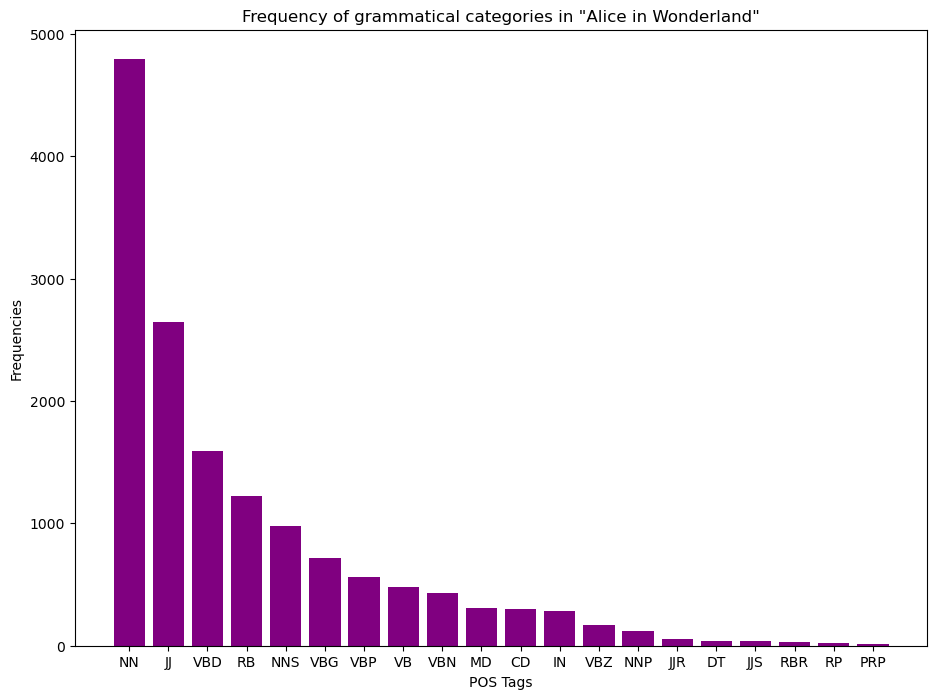

In [13]:
tags= [str(i[1]) for i in pos_words]
freqdist= FreqDist(tags)
print('Most frequent POS tags:',freqdist.most_common(20))

#Data preparing for the plot
frequencies = [count for tag, count in freqdist.most_common(20)]
labels = [tag for tag, count in freqdist.most_common(20)]

#Bar graph 
fig, ax = plt.subplots(figsize=(11, 8))
ax.bar(labels, frequencies, color='purple')
ax.set_title('Frequency of grammatical categories in "Alice in Wonderland"')
ax.set_xlabel('POS Tags')
ax.set_ylabel('Frequencies')

plt.show()


For demostration purposes, we show a complete version of the set of tags in a plot.

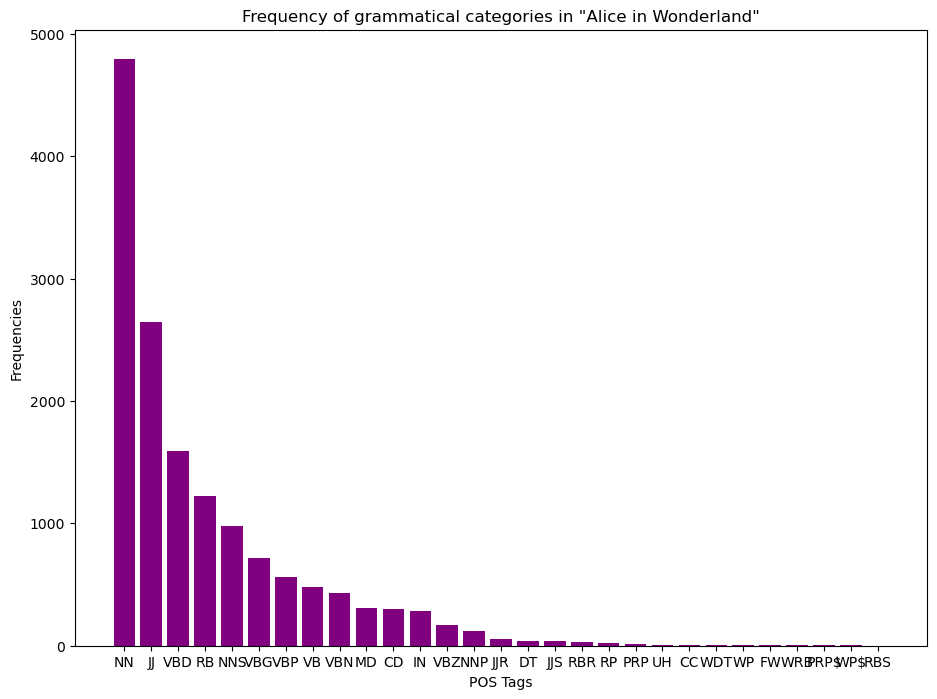

In [14]:
#In case of wanting to plot all of the tags (not just the 20 most frequent)

#Data preparing for the plot
frequencies = [count for tag, count in freqdist.most_common()]
labels = [tag for tag, count in freqdist.most_common()]

#Bar graph 
fig, ax = plt.subplots(figsize=(11, 8))
ax.bar(labels, frequencies, color='purple')
ax.set_title('Frequency of grammatical categories in "Alice in Wonderland"')
ax.set_xlabel('POS Tags')
ax.set_ylabel('Frequencies')

plt.show()

